In [3]:
import pandas as pd
df = pd.read_csv("penguins.csv")
df.head()

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year,species
0,1,Torgersen,39.1,18.7,181.0,3750.0,male,2007,Adelie
1,2,Torgersen,39.5,17.4,186.0,3800.0,female,2007,Adelie
2,3,Torgersen,40.3,18.0,195.0,3250.0,female,2007,Adelie
3,4,Torgersen,NaN,NaN,NaN,NaN,NaN,2007,Adelie
4,5,Torgersen,36.7,19.3,193.0,3450.0,female,2007,Adelie


In [4]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,0:8]
y = df["species"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [5]:

print(X_train.shape)
print(X_test.shape)

(70, 8)
(30, 8)


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['island'] = encoder.fit_transform(df['island'])
df['sex'] = encoder.fit_transform(df['sex'])
df['species'] = encoder.fit_transform(df['species'])

In [7]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
df_new = df.copy()
X = df_new.drop(columns=['species'])
y = df_new["species"]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
df_scaled = pd.DataFrame(scaled_data, columns=X.columns)
print(df_scaled.head())


      rowid  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0 -1.299156    1.75       -0.779393       0.853345          -1.305745   
1 -1.286229    1.75       -0.698189       0.286650          -0.983257   
2 -1.273302    1.75       -0.535780       0.548202          -0.402780   
3 -1.260375    1.75             NaN            NaN                NaN   
4 -1.247448    1.75       -1.266618       1.114897          -0.531775   

   body_mass_g       sex      year  
0    -0.744138  0.634419 -0.436436  
1    -0.684607 -0.992296 -0.436436  
2    -1.339448 -0.992296 -0.436436  
3          NaN  2.261134 -0.436436  
4    -1.101324 -0.992296 -0.436436  


In [8]:
# Calculate percentage of missing values per column
missing_percent = df_scaled.isnull().mean().sort_values(ascending=False)*100

print("Missing Value Percentage by Columns:\n", round(missing_percent, 2))


Missing Value Percentage by Columns:
 bill_length_mm       3.0
flipper_length_mm    2.0
bill_depth_mm        1.0
body_mass_g          1.0
rowid                0.0
island               0.0
sex                  0.0
year                 0.0
dtype: float64


In [9]:
for col in df_scaled.columns: 
    missing_percent = df_scaled [col].isnull().mean() * 100 
    if missing_percent >20: 
        df_scaled=df_scaled.drop(columns=[col]) 
df_scaled.head()

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,-1.299156,1.75,-0.779393,0.853345,-1.305745,-0.744138,0.634419,-0.436436
1,-1.286229,1.75,-0.698189,0.286650,-0.983257,-0.684607,-0.992296,-0.436436
2,-1.273302,1.75,-0.535780,0.548202,-0.402780,-1.339448,-0.992296,-0.436436
3,-1.260375,1.75,NaN,NaN,NaN,NaN,2.261134,-0.436436
4,-1.247448,1.75,-1.266618,1.114897,-0.531775,-1.101324,-0.992296,-0.436436


In [10]:
for col in df_scaled.columns: 
    missing_percent= df_scaled [col].isnull().mean()* 100 
    if missing_percent<20: 
        df_scaled = df_scaled.fillna(df_scaled.mean()) 
df_scaled.tail()

,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
95,1.247448,-0.75,0.134154,-1.239068,1.016164,0.625076,-0.992296,2.291288
96,1.260375,-0.75,0.519874,-1.239068,0.564682,-0.208359,-0.992296,2.291288
97,1.273302,-0.75,1.534927,-0.367229,1.532144,1.220386,0.634419,2.291288
98,1.286229,-0.75,0.398068,-1.500620,0.758174,0.863200,-0.992296,2.291288
99,1.299156,-0.75,0.458971,-0.410821,0.887169,1.101324,0.634419,2.291288


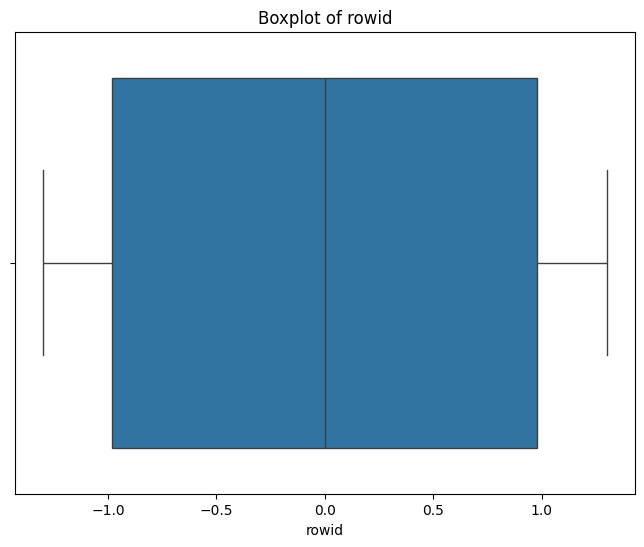

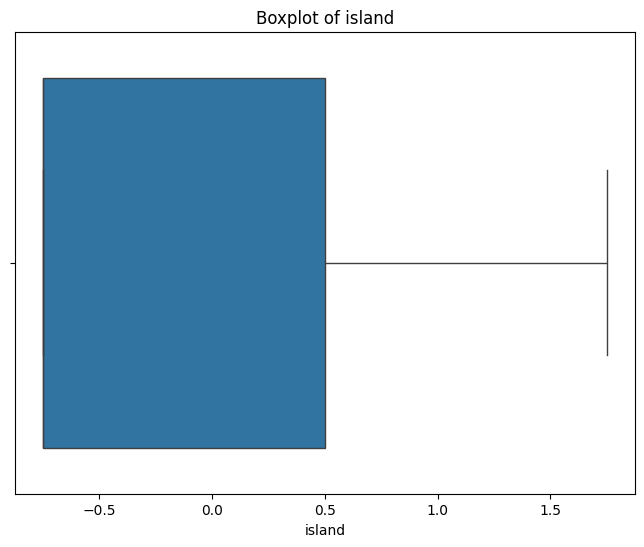

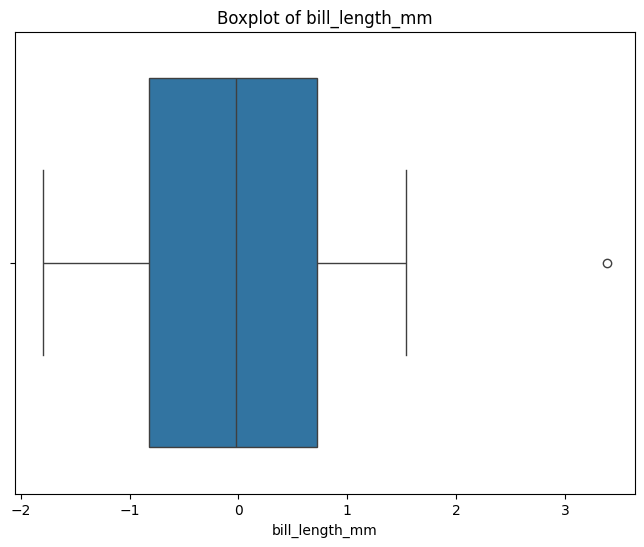

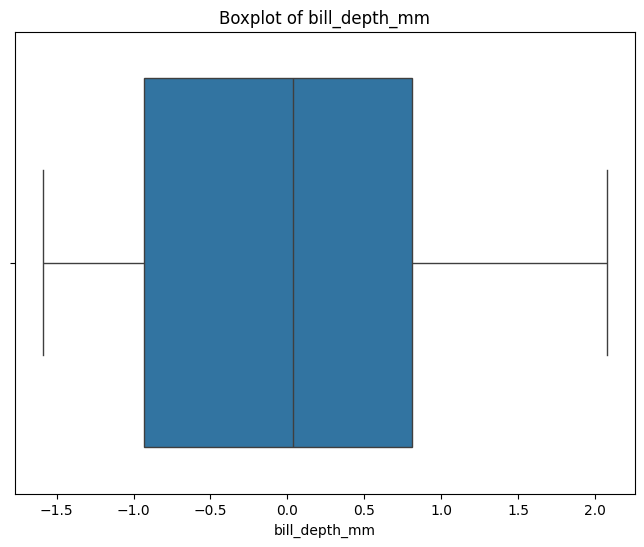

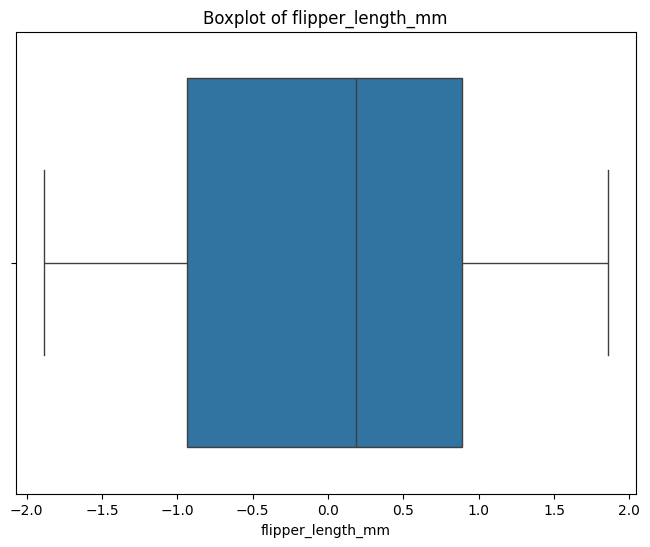

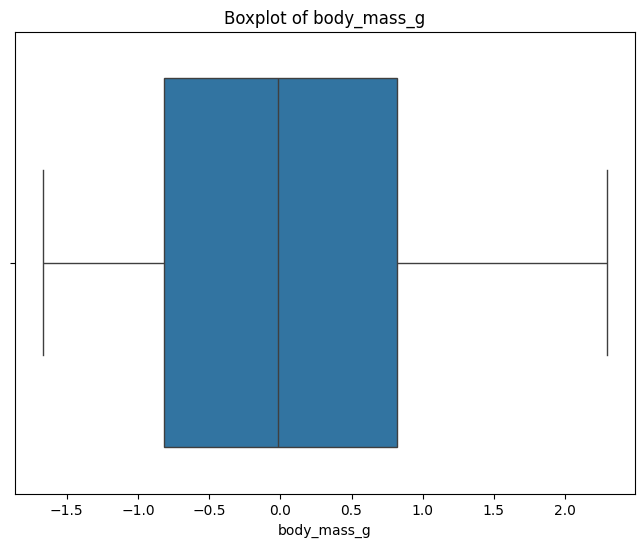

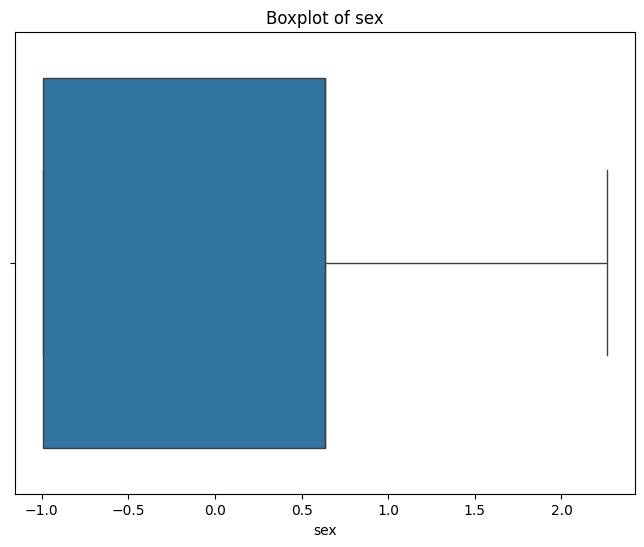

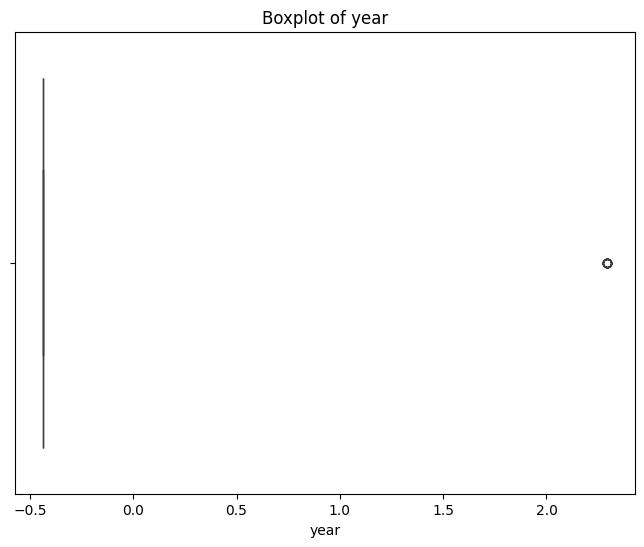


Shape after outlier removal: (83, 8)


,rowid,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,-1.299156,1.75,-7.793929e-01,8.533455e-01,-1.305745e+00,-7.441376e-01,0.634419,-0.436436
1,-1.286229,1.75,-6.981887e-01,2.866501e-01,-9.832574e-01,-6.846066e-01,-0.992296,-0.436436
2,-1.273302,1.75,-5.357803e-01,5.482018e-01,-4.027801e-01,-1.339448e+00,-0.992296,-0.436436
3,-1.260375,1.75,1.037543e-15,1.059758e-16,-7.363724e-17,-2.242875e-18,2.261134,-0.436436
4,-1.247448,1.75,-1.266618e+00,1.114897e+00,-5.317751e-01,-1.101324e+00,-0.992296,-0.436436


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column): 
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_no_outliers = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_no_outliers 

# Boxplot before outlier removal
for column in df_scaled.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df_scaled[column])
    plt.title(f"Boxplot of {column}") 
    plt.show()

# Apply outlier removal to each column
for column in df_scaled.columns:
    df_scaled = remove_outliers_iqr(df_scaled, column)

# Display shape after outlier removal
print("\nShape after outlier removal:", df_scaled.shape)
df_scaled.head()


In [12]:
from sklearn.feature_selection import VarianceThreshold 
selector =VarianceThreshold (threshold=0) 
selector.fit(df_scaled) 
mask =selector.get_support() 
constant_features= df_scaled.columns[~mask] 
constant_features.tolist()

['year']

In [13]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

variance_threshold = 0.01

selector = VarianceThreshold(threshold=variance_threshold)
X_high_variance = selector.fit_transform(df_scaled)

kept_features_indices = selector.get_support(indices=True)
kept_features = df_scaled.columns[kept_features_indices]
removed_features = df_scaled.columns[~selector.get_support()]

print("Features with low variance (removed):", removed_features.tolist())
print("Features with high variance (kept):", kept_features.tolist())

df_high_variance = pd.DataFrame(X_high_variance, columns=kept_features)

print("\nDataFrame with high-variance features:")
print(df_high_variance.head())


Features with low variance (removed): ['year']
Features with high variance (kept): ['rowid', 'island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

DataFrame with high-variance features:
      rowid  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0 -1.299156    1.75   -7.793929e-01   8.533455e-01      -1.305745e+00   
1 -1.286229    1.75   -6.981887e-01   2.866501e-01      -9.832574e-01   
2 -1.273302    1.75   -5.357803e-01   5.482018e-01      -4.027801e-01   
3 -1.260375    1.75    1.037543e-15   1.059758e-16      -7.363724e-17   
4 -1.247448    1.75   -1.266618e+00   1.114897e+00      -5.317751e-01   

    body_mass_g       sex  
0 -7.441376e-01  0.634419  
1 -6.846066e-01 -0.992296  
2 -1.339448e+00 -0.992296  
3 -2.242875e-18  2.261134  
4 -1.101324e+00 -0.992296  


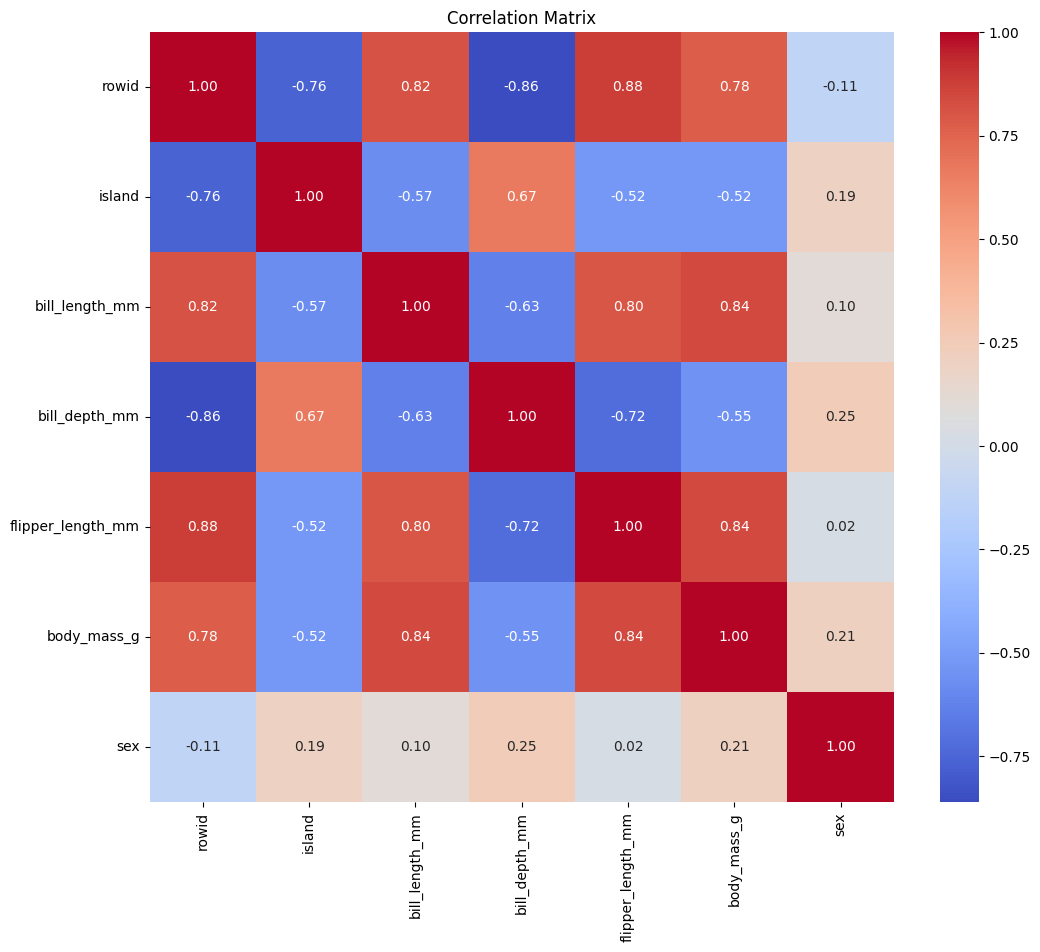


Removed highly correlated features: ['body_mass_g', 'bill_depth_mm', 'flipper_length_mm', 'bill_length_mm']

DataFrame after removing highly correlated features:
      rowid  island       sex
0 -1.299156    1.75  0.634419
1 -1.286229    1.75 -0.992296
2 -1.273302    1.75 -0.992296
3 -1.260375    1.75  2.261134
4 -1.247448    1.75 -0.992296


In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df_high_variance.corr()

correlation_threshold = 0.8
highly_correlated_features = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):  # Only upper triangle
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[j]  # Remove later feature
            highly_correlated_features.add(colname)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

df_no_multicollinearity = df_high_variance.drop(columns=highly_correlated_features)

print("\nRemoved highly correlated features:", list(highly_correlated_features))
print("\nDataFrame after removing highly correlated features:")
print(df_no_multicollinearity.head())


In [18]:

X = df_no_multicollinearity.dropna()
y = df["species"].loc[X.index]

selector_kbest = SelectKBest(score_func=f_regression, k=3)
X_kbest = selector_kbest.fit_transform(X, y)
selected_indices_kbest = selector_kbest.get_support(indices=True)
selected_features_kbest = X.columns[selected_indices_kbest]

print("\nSelected features using SelectKBest:", selected_features_kbest.tolist())

selector_percentile = SelectPercentile(score_func=f_regression, percentile=20)
X_percentile = selector_percentile.fit_transform(X, y)
selected_indices_percentile = selector_percentile.get_support(indices=True)
selected_features_percentile = X.columns[selected_indices_percentile]

print("\nSelected features using SelectPercentile:", selected_features_percentile.tolist())

df_kbest = pd.DataFrame(X_kbest, columns=selected_features_kbest)
df_percentile = pd.DataFrame(X_percentile, columns=selected_features_percentile)

print("\nDataFrame with SelectKBest Features:")
print(df_kbest.head())

print("\nDataFrame with SelectPercentile Features:")
print(df_percentile.head())


Shape of X: (83, 3)
Shape of y: (83,)

Selected features using SelectKBest: ['rowid', 'island', 'sex']

Selected features using SelectPercentile: ['rowid']

DataFrame with SelectKBest Features:
      rowid  island       sex
0 -1.299156    1.75  0.634419
1 -1.286229    1.75 -0.992296
2 -1.273302    1.75 -0.992296
3 -1.260375    1.75  2.261134
4 -1.247448    1.75 -0.992296

DataFrame with SelectPercentile Features:
      rowid
0 -1.299156
1 -1.286229
2 -1.273302
3 -1.260375
4 -1.247448


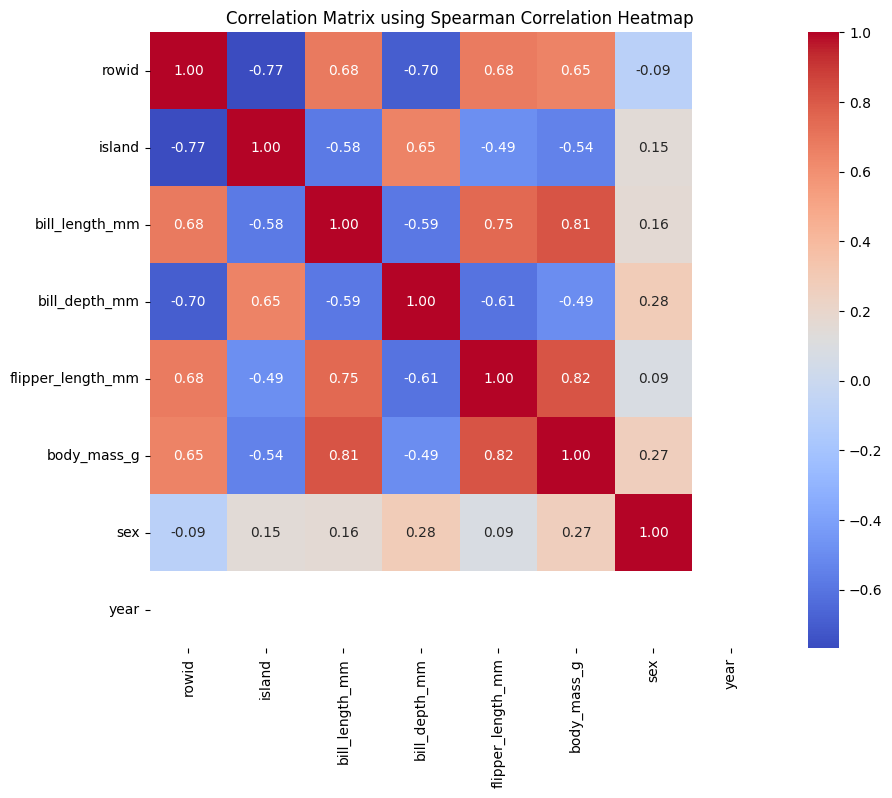

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

X = df_scaled
y = df["species"]

correlation_matrix = X.corr(method="spearman")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix using Spearman Correlation Heatmap")
plt.show()


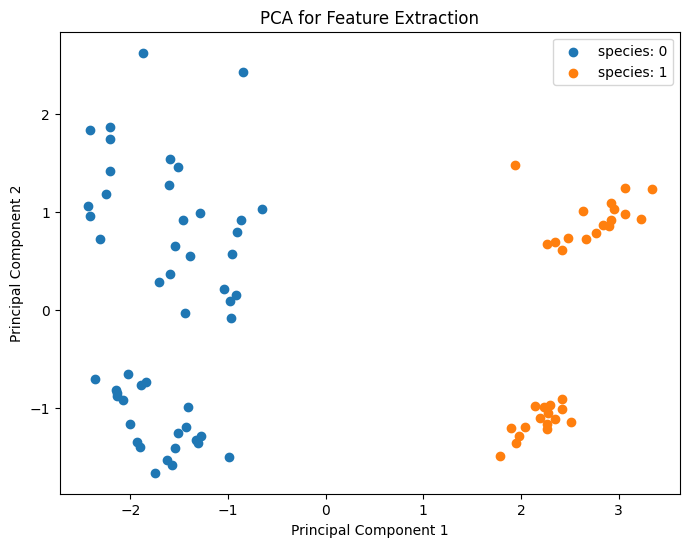

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Define feature matrix (X) and target variable (y)
X = df_scaled
y = df["species"]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca["species"] = y  # Adding the target variable back for plotting

plt.figure(figsize=(8, 6))

for label in np.unique(y):
    subset = df_pca[df_pca["species"] == label]
    plt.scatter(subset["PC1"], subset["PC2"], label=f"species: {label}")

plt.title("PCA for Feature Extraction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


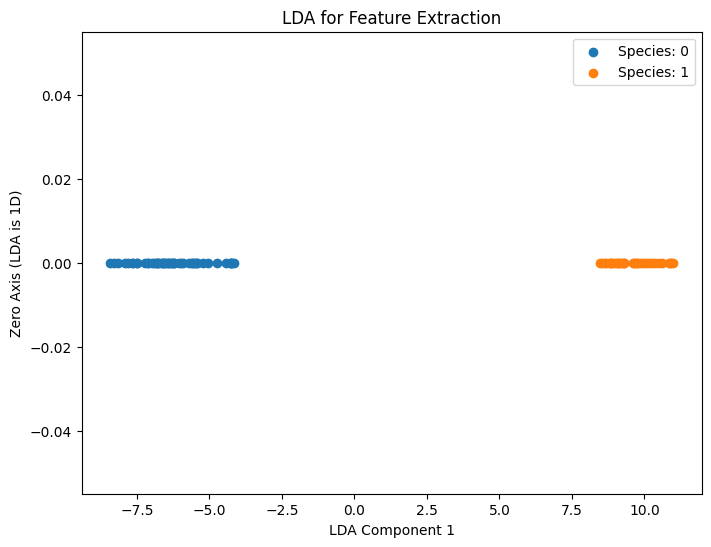

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = df_scaled 
y = df["species"]  

X = X.dropna()
y = y.loc[X.index]

n_classes = len(np.unique(y))

n_components = min(X.shape[1], n_classes - 1)  


lda = LinearDiscriminantAnalysis(n_components=n_components)
X_lda = lda.fit_transform(X, y)

df_lda = pd.DataFrame(X_lda, columns=[f"LDA{i+1}" for i in range(n_components)])
df_lda["Species"] = y.values

plt.figure(figsize=(8, 6))
if n_components == 1:
    for label in np.unique(y):
        subset = df_lda[df_lda["Species"] == label]
        plt.scatter(subset["LDA1"], np.zeros_like(subset["LDA1"]), label=f"Species: {label}")
    plt.ylabel("Zero Axis (LDA is 1D)")
else:
    for label in np.unique(y):
        subset = df_lda[df_lda["Species"] == label]
        plt.scatter(subset["LDA1"], subset["LDA2"], label=f"Species: {label}")
    plt.ylabel("LDA Component 2")

plt.title("LDA for Feature Extraction")
plt.xlabel("LDA Component 1")
plt.legend()
plt.show()
